In [2]:
"""
Briar Doty
AMATH 584 - HW5
12/1/20
Full repository available at https://github.com/briardoty/amath584/tree/main/hw5
"""

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from svd_faces import *

In [20]:
# 1a - generate a symmetric matrix A and find its eigenvalues/vectors

def get_sym(m):
    A = np.zeros((m,m))
    
    for i in range(m):
        for j in range(i,m):
            r = np.random.rand()
            A[i,j] = r
            A[j,i] = r
    
    return A

A = get_sym(10)
w, v = np.linalg.eig(A)
print(w)

[ 4.7993923  -1.43310891 -0.9203966  -0.67519157  1.25131476 -0.19893222
  0.07272321  0.31744717  0.78992756  0.55559177]


In [21]:
# 1bi - find the largest eigenvalue with the power iteration method

def get_largest_eig(A, k=100, cmplx=False):
    
    m, m = A.shape
    
    # guess first eigenvector
    x = np.random.rand(m)
    if cmplx:
        x = np.array([complex(xi,0) for xi in x])
    x = np.divide(x, np.linalg.norm(x))

    # iterate
    for i in range(k):
        x = A@x
        x = np.divide(x, np.linalg.norm(x))
        lmbda = x.T@A@x
        
    return lmbda, x

lmbda, x = get_largest_eig(A)
print(f"Largest eigenvalue: {lmbda}")
    
# error
err = np.sqrt((lmbda - w[0])**2)
print(f"Error: {err}")


Largest eigenvalue: 4.799392298637093
Error: 2.6645352591003757e-15


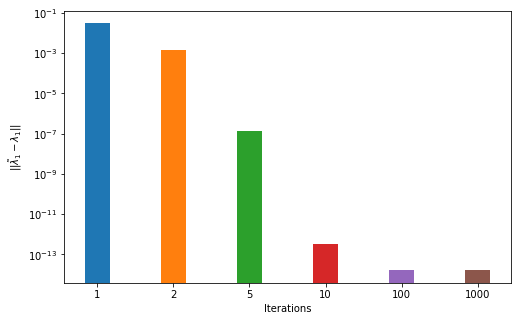

In [5]:
# 1bii - compare accuracy as a function of iterations
iteration_arr = [1, 2, 5, 10, 100, 1000]

# fig
fig, ax = plt.subplots(figsize=(8,5))
ax.axhline(y=0, color="k", linestyle="--", alpha=0.2)
xpos, width = 0, 1/len(iteration_arr)
labels, ticks = [], []

# different iterations k
for k in iteration_arr:
    
    # call fn
    lmbda, x = get_largest_eig(A, k)
    
    # error
    err = np.sqrt((lmbda - w[0])**2)
    
    # plot
    l = f"{k}"
    labels.append(l)
    ticks.append(xpos)
    ax.bar(xpos, err, width, label=l)
    xpos += 0.5
    
# plot info
ax.set_xlabel("Iterations")
ax.set_ylabel(r"||$\tilde{\lambda}_1 - \lambda_1$||")
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.set_yscale("log")

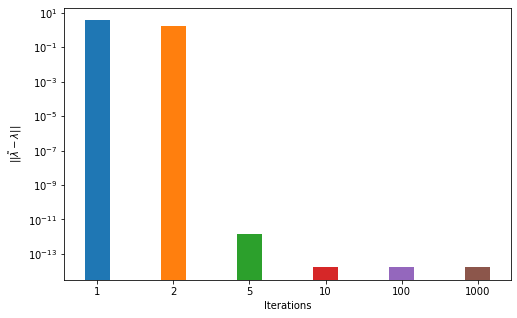

In [6]:
# 1c - Rayleigh quotient iterations
"""
Since the eigenvectors form an orthonormal basis, we can use an
orthogonalization procedure like Gram-Schmidt to take our random
guesses for each initial eigenvector and make them orthogonal to
all previously discovered eigenvectors.
"""

def rayleigh_itrn(A, k=100, cmplx=False):
    
    m, m = A.shape
    
    # init results
    w_rayleigh = []
    v_rayleigh = np.zeros((m,m), dtype=complex if cmplx else float)
    
    # find each eig
    for j in range(m):
    
        # guess initial "eigenvector"
        v = np.random.rand(m)
        if cmplx:
            v = np.array([complex(vi,np.random.rand()) for vi in v])
        
        # make orthogonal to previous eigs via gram-schmidt
        proj = np.zeros_like(v, dtype=complex if cmplx else float)
        for vi in np.arange(j):
            u = v_rayleigh[:,vi]
            proj += (np.vdot(v, u) / np.vdot(u, u)) * u
        v -= proj
        
        # normalize guess
        v = np.divide(v, np.linalg.norm(v))
        l = v.T@A@v        

        # iterate
        for i in range(k):
            v = np.linalg.inv(A - l*np.eye(m))@v
            v = np.divide(v, np.linalg.norm(v))
            l = v.T@A@v
            
        w_rayleigh.append(l)
        v_rayleigh[:,j] = v
        
    return w_rayleigh, v_rayleigh

# try different iterations
iteration_arr = [1, 2, 5, 10, 100, 1000]

# fig
fig, ax = plt.subplots(figsize=(8,5))
ax.axhline(y=0, color="k", linestyle="--", alpha=0.2)
xpos, width = 0, 1/len(iteration_arr)
labels, ticks = [], []

# different iterations k
for k in iteration_arr:
    
    # call fn
    w_rayleigh, v_rayleigh = rayleigh_itrn(A, k)
    
    # error
    err = np.linalg.norm(np.array(sorted(w)) - np.array(sorted(w_rayleigh)))
    
    # plot
    l = f"{k}"
    labels.append(l)
    ticks.append(xpos)
    ax.bar(xpos, err, width, label=l)
    xpos += 0.5
    
# plot info
ax.set_xlabel("Iterations")
ax.set_ylabel(r"||$\tilde{\lambda} - \lambda$||")
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.set_yscale("log")

Actual eigenvalues: [ 4.68244628+0.j          0.49009015+0.52287561j  0.49009015-0.52287561j
 -0.79734694+0.04151279j -0.79734694-0.04151279j -0.27105547+0.51530981j
 -0.27105547-0.51530981j -0.32945273+0.j          0.05598695+0.17269844j
  0.05598695-0.17269844j]

Largest eigenvalue: (4.671181680892531+0j)
Largest eigenvalue: (4.674815030680667+0j)
Largest eigenvalue: (4.682448202088876+0j)
Largest eigenvalue: (4.682446280292766+0j)
Largest eigenvalue: (4.682446279791179+0j)
Largest eigenvalue: (4.682446279791179+0j)


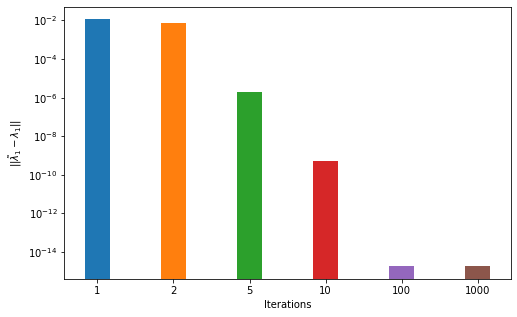

In [9]:
# 1di - asymmetric matrix power iterations
"""
Based on the error plot, this approach does not converge as
quickly for asymmetric matrices.
"""
A2 = np.random.rand(10,10)
w2, v2 = np.linalg.eig(A2)
print(f"Actual eigenvalues: {w2}\n")

# fig
fig, ax = plt.subplots(figsize=(8,5))
ax.axhline(y=0, color="k", linestyle="--", alpha=0.2)
xpos, width = 0, 1/len(iteration_arr)
labels, ticks = [], []

# different iterations k
iteration_arr = [1, 2, 5, 10, 100, 1000]
for k in iteration_arr:
    
    # call fn
    lmbda, x = get_largest_eig(A2, k, cmplx=True)
    
    print(f"Largest eigenvalue: {lmbda}")
    
    # error
    err = np.linalg.norm(lmbda - w2[0])
    
    # plot
    l = f"{k}"
    labels.append(l)
    ticks.append(xpos)
    ax.bar(xpos, err, width, label=l)
    xpos += 0.5
    
# plot info
ax.set_xlabel("Iterations")
ax.set_ylabel(r"||$\tilde{\lambda}_1 - \lambda_1$||")
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.set_yscale("log")

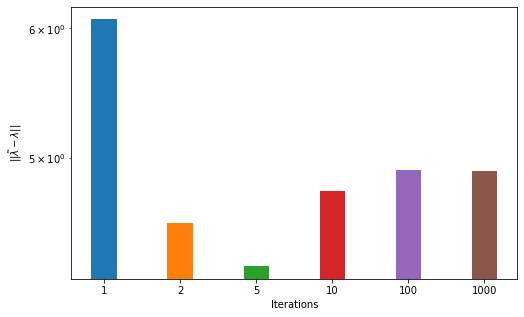

In [10]:
# 1dii - asymmetric matrix rayleigh quotient iterations
"""
Since this matrix is asymmetric, we cannot exploit the orthogonality 
of eigenvectors by using Gram-Schmidt orthogonalization to choose
our initial guesses. This makes it much harder to reliably find all
eigen pairs. Increasing the number of iterations does not help
fix this issue, because it is highly dependent on the initial guess.
"""

# fig
fig, ax = plt.subplots(figsize=(8,5))
ax.axhline(y=0, color="k", linestyle="--", alpha=0.2)
xpos, width = 0, 1/len(iteration_arr)
labels, ticks = [], []

# different iterations k
for k in iteration_arr:
    
    # call fn
    w_rayleigh, v_rayleigh = rayleigh_itrn(A2, k, cmplx=True)
    
    # error
    err = np.linalg.norm(np.array(sorted(w2)) - np.array(sorted(w_rayleigh)))
    
    # plot
    l = f"{k}"
    labels.append(l)
    ticks.append(xpos)
    ax.bar(xpos, err, width, label=l)
    xpos += 0.5
    
# plot info
ax.set_xlabel("Iterations")
ax.set_ylabel(r"||$\tilde{\lambda} - \lambda$||")
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.set_yscale("log")

In [97]:
# 2a - power iterate cropped svd faces
"""
These are not as close as I would expect. Since I am computing the SVD of
faces_arr, an mxn, real-valued matrix, and the top eigenvalue of faces_cov,
an nxn real-valued, symmetric matrix, I would expect the top singular value
to equal the square root of the top eigenvalue. However, this is not the
case, and I don't see why.
"""

# load cropped images
faces_arr, x, y = load_faces(cropped=True)

# compute covariance matrix
faces_cov = (faces_arr.T)@(faces_arr)

# perform svd decomposition for ground-truth
u, s, vh = linalg.svd(faces_arr, full_matrices=False)

# power iterate on faces_cov
lmbda0, v0 = get_largest_eig(faces_cov, k=10, cmplx=False)

print(f"Largest eigenvalue: {lmbda0}")
print(f"Largest singular value: {s[0]}")

Largest eigenvalue: 310031.73837215506
Largest singular value: 350349.21148267627


In [121]:
# 2b - randomized sampling to compute svd
"""
Comparison with ground truth singular modes at bottom of cell
"""

A = faces_arr

def randomized_svd(A, k=10):

    # stage 1: random sampling and QR
    m, n = A.shape
    omega = np.random.rand(n,k)
    Y = A@omega
    Q, R = linalg.qr(Y)

    # stage 2: projection and SVD
    B = (Q.T)@A
    ub, sb, vb = linalg.svd(B, full_matrices=False)
    U_approx = Q@ub
    S_approx = Q@sb
    V_approx = Q@vb

    return U_approx, S_approx, V_approx

# run once
U_approx, S_approx, V_approx = randomized_svd(A)

The first 1 mode accounts for 0.021986754163091808% of variance.
The first 2 modes account for 0.04551642560862393% of variance.
The first 4 modes account for 0.1047167975144403% of variance.
The first 6 modes account for 0.16412521891401818% of variance.
The first 8 modes account for 0.23577007717932197% of variance.


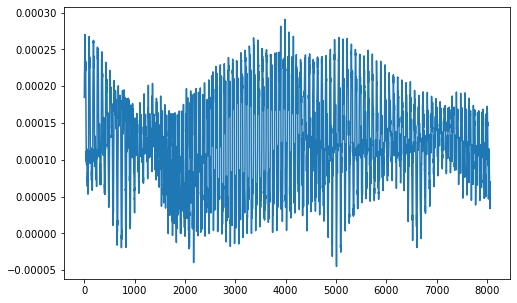

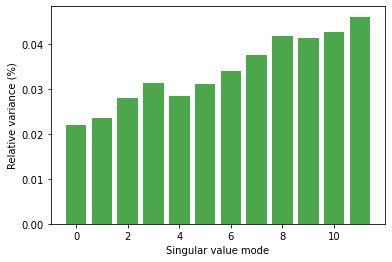

In [129]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(S_approx / sum(S_approx))

summarize_svd_spectrum(S_approx, bins=12, modes=10)

The first 1 mode accounts for 71.75418477428542% of variance.
The first 2 modes account for 86.56123126666792% of variance.
The first 4 modes account for 91.01058068207044% of variance.
The first 6 modes account for 92.25847105015076% of variance.
The first 8 modes account for 93.11389136850967% of variance.


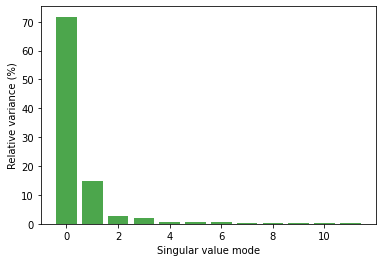

In [71]:
# 2c - modes and decay as function of number of samples

# actual top modes
display_top_modes(u, x, y, few=5)

# fig
fig, ax = plt.subplots(figsize=(8,5))
ax.axhline(y=0, color="k", linestyle="--", alpha=0.2)
xpos, width = 0, 1/len(iteration_arr)
labels, ticks = [], []

# different iterations k
iteration_arr = [1, 2, 5, 10, 100, 1000]
for k in iteration_arr:
    
    # call fn
    U_approx, S_approx, V_approx = randomized_svd(A,k)

    # approximated top modes
    display_top_modes(U_approx, x, y, few=min(k,5))
    
    # quantify SVD decay
    
    
    # error
    
    err = np.linalg.norm(np.array(sorted(w2)) - np.array(sorted(w_rayleigh)))
    
    # plot
    l = f"{k}"
    labels.append(l)
    ticks.append(xpos)
    ax.bar(xpos, err, width, label=l)
    xpos += 0.5
    
# plot info
ax.set_xlabel("Iterations")
ax.set_ylabel(r"||$\tilde{\lambda} - \lambda$||")
ax.set_xticks(ticks)
ax.set_xticklabels(labels)
ax.set_yscale("log")

# summarize_svd_spectrum(s, bins=12, modes=10)